In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df= pd.read_csv('/content/drive/MyDrive/Salaries.csv')
print(df)

            Id       EmployeeName  \
0            1     NATHANIEL FORD   
1            2       GARY JIMENEZ   
2            3     ALBERT PARDINI   
3            4  CHRISTOPHER CHONG   
4            5    PATRICK GARDNER   
...        ...                ...   
148649  148650      Roy I Tillery   
148650  148651       Not provided   
148651  148652       Not provided   
148652  148653       Not provided   
148653  148654          Joe Lopez   

                                              JobTitle    BasePay  \
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18   
1                      CAPTAIN III (POLICE DEPARTMENT)  155966.02   
2                      CAPTAIN III (POLICE DEPARTMENT)  212739.13   
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00   
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60   
...                                                ...        ...   
148649                                       Custodian       0.00   
148

In [6]:
#directSolution
df.shape

(148654, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [8]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [9]:
df[['TotalPay']].describe()

,TotalPay
count,148654.000000
mean,74768.321972
std,50517.005274
min,-618.130000
25%,36168.995000
50%,71426.610000
75%,105839.135000
max,567595.430000


In [10]:
#I need to check the mean BasePay to fill nan value in this column
df[['BasePay']].describe()

,BasePay
count,148045.000000
mean,66325.448840
std,42764.635495
min,-166.010000
25%,33588.200000
50%,65007.450000
75%,94691.050000
max,319275.010000


In [11]:
#then i fill this columns(have small null group),zero to ather&overtime pay its logic, right
df.fillna({"OtherPay":0,"OvertimePay":0,"BasePay":6600},inplace=True)

In [ ]:
#to check the prev. step
##df_1.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [12]:
# then i use dropna to remove empty columns&near empty
df.dropna(axis='columns',inplace=True)

In [ ]:
# to check pre. step
##df_cle.isnull().sum()

Id                  0.0
EmployeeName        0.0
JobTitle            0.0
BasePay             0.0
OvertimePay         0.0
OtherPay            0.0
Benefits            0.0
TotalPay            0.0
TotalPayBenefits    0.0
Year                0.0
Notes               0.0
Agency              0.0
Status              0.0
dtype: float64

In [ ]:
#final,i check cleaning process true
##df_cle.shape

(148654, 10)

In [13]:
#i think is not logical totalpay=0
for i in df.index:
    if df.loc[i,"TotalPay"]==0:
        df.drop(i,inplace=True)


In [14]:
df.shape

(148286, 10)

<Axes: xlabel='TotalPay', ylabel='Count'>

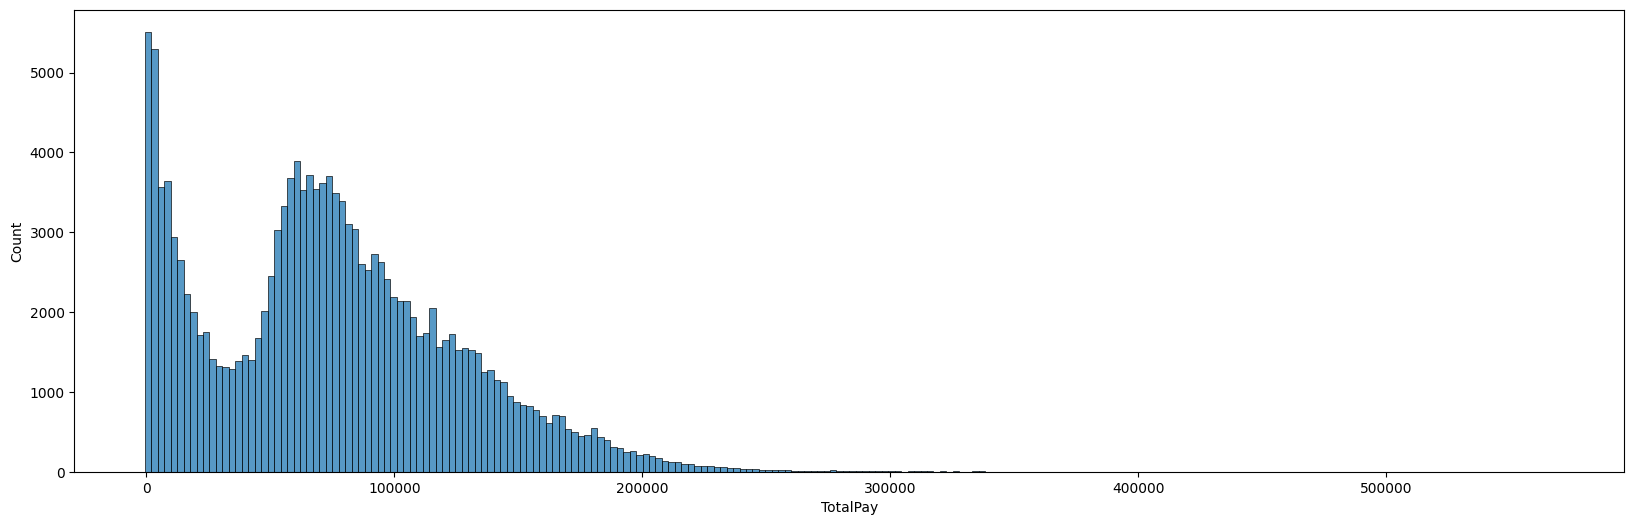

In [15]:
plt.figure(figsize=(20,6))
sns.histplot(data=df,x='TotalPay')


<Axes: title={'center': 'different departments'}, ylabel='JobTitle'>

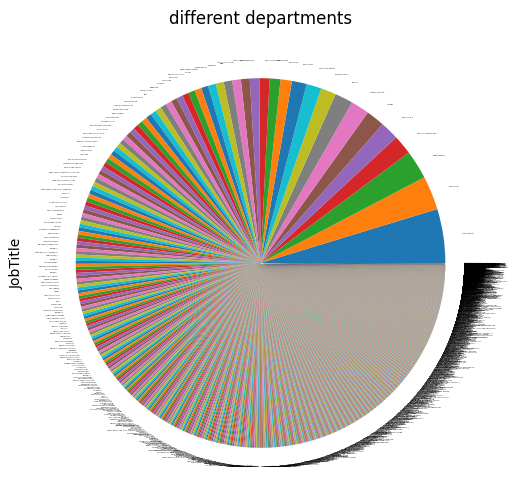

In [17]:

df['JobTitle'].value_counts().plot(kind='pie',title='different departments',fontsize='0.5',figsize=(6,6))


In [22]:
df.groupby(["Year"])["TotalPay"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2011,36156.0,71750.056751,47496.180914,0.30,36831.4500,68217.525,102517.1975,567595.43
2012,36741.0,74163.691800,49502.988373,1.77,37622.5100,70753.440,104142.3400,362844.66
2013,37318.0,78210.405992,52615.027374,5.56,38321.5825,74874.610,110147.0125,347102.32
2014,38071.0,75566.991969,51657.670672,-618.13,33684.6150,72413.360,108064.2900,471952.64


In [23]:
df.groupby(["JobTitle"])["TotalPay"].mean()

JobTitle
ACCOUNT CLERK                                     44035.664337
ACCOUNTANT                                        47429.268000
ACCOUNTANT INTERN                                 29031.742917
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     67594.400000
                                                      ...     
X-RAY LABORATORY AIDE                             52705.880385
X-Ray Laboratory Aide                             50823.942700
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870000
Youth Comm Advisor                                41414.307500
ZOO CURATOR                                       66686.560000
Name: TotalPay, Length: 2155, dtype: float64

In [ ]:
corr_matrix =df.corr()
corr_matrix["TotalPay"]
#so we are make sense between TotalPay&TotalPayBenefits

<ipython-input-35-1bc748550c01>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =df.corr()


Id                 -0.209249
BasePay             0.954466
OvertimePay         0.504731
OtherPay            0.470233
TotalPay            1.000000
TotalPayBenefits    0.977209
Year                0.033958
Name: TotalPay, dtype: float64

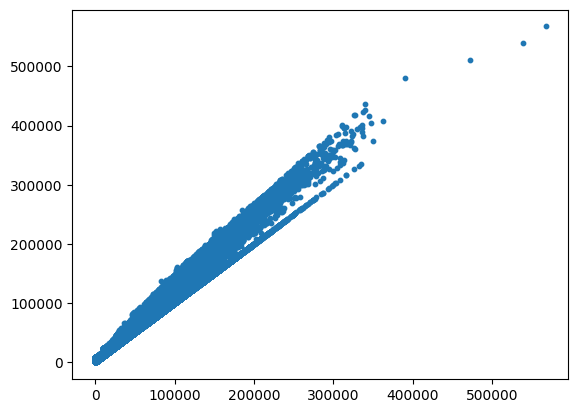

In [ ]:
plt.scatter(x='TotalPay',y='TotalPayBenefits',data=df,s=10)
plt.show()

array([     1,      2,      3, ..., 148652, 148653, 148654])

Brief Report:1)A biggest total salary was in2013, 2) The lowest salary was in2014, 3) the avarge range salary in all year between~71000to7900, 4)A highest mean salary in ACUPUNCTURIST and small mean inACCOUNTANT INTERN, 5) Employess who got highest salary also got highest benefits"direct relationship", 6) The largest number of employess was in transit operator department and then in special nurse then in registered nurse